<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#problem" data-toc-modified-id="problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>problem</a></span></li><li><span><a href="#my-functions" data-toc-modified-id="my-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>my functions</a></span></li><li><span><a href="#equations" data-toc-modified-id="equations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>equations</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

# problem

# my functions

# equations

The Gibbs free energy of a multi-phase-field (MPF) system could be seen (from a first approach) as a summation of an interfacial free energy density [$J.m^{-3}$] (also called Grain-Boundary (GB)) $f^{GB}$ and a chemical one $f^{chem}$ as follows.  


$F = \int_\Omega f^{GB} + f^{chem}$

The other contributions could be added added to the MPF free energy forumaltuion, such as the mechanical ($f^{chem}$) and magnetic ones.

$f^{GB} = \sum _{\alpha,\beta=1..N,\alpha > \beta} \frac{4\sigma_{\alpha\beta}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_\alpha \cdot \nabla\phi_\beta  + \phi_\alpha \phi_\beta \Bigm\}$

 $\phi_\alpha$ is is the non-conservative phase-field variable corresponding to the phase $\alpha$ (idem for $\beta$), N is the number of components/crysals present in the system, $\sigma_{\alpha\beta}$ is the interfacial energy while $\eta$ is the intrface width.  

For a system with two-phases (binary), the previous expression becomes:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{ -\frac{\eta^2}{\pi^2} \nabla\phi_ \cdot \nabla(1-\phi_)  + \phi (1-\phi ) \Bigm\}$

or simply:

$f^{GB} =  \frac{4\sigma_{}}{\eta} \Bigm\{\phi (1-\phi )+ \frac{\eta^2}{\pi^2} (\nabla\phi) ^{2}  \Bigm\}$

Th temporal evolution of the non-conserved order parameter $\phi$ follows the Allen-Cahn formualtion :

$\frac{\partial \phi}{\partial t}=-L. \frac{\delta F}{\delta \phi}$

where $L$ is the kinetic coefficient of the interface.

in 1D, for a dual interface ($f^{GB}$ is noted hereafter $f^{int}$), when considereing only the interfacial energy $F = \int_\Omega f^{int} dx$, the AC formulation gives:

$\frac{\partial \phi}{\partial t}=-L \Bigm\{ \frac{\partial f^{int}}{\partial \phi} - \nabla \cdot \frac{\partial f^{int}}{\partial (\nabla \phi)} \Bigm\}$

then:

$\frac{\partial \phi}{\partial t} = L \Bigg( \frac{4\sigma}{\eta} \bigg[ (2\phi - 1 )+ 2 \frac{\eta^2}{\pi^2} \nabla^2 \phi \bigg] \Bigg)$

This expression could be also expressed as :

$\dot{\phi}=\mu \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2 \phi-1)\right)$

#### where

where: $\mu=\frac{8\eta L}{\pi^{2}} $

We should note that the previous developements concern only the interface contrubution. However, in order to garantee a moving interface, the non interfacial contributions should be taken into account: 

$f^{dual}=f^{int} + h(\phi) \Delta g$

$\Rightarrow$ The evolution of the order parameter with respect to time is described by this equation: 

$\dot{ \phi}=\mu \left[ \sigma\left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) + \frac{\pi \sqrt{\phi(1-\phi)}}{\eta} \Delta g \right] $

where the left side describes the interfacial changes while the right one controls the moving of the interface

To solve this equation, we can use the following time-stepping scheme:

$
\dfrac{\phi_{k}^{n+1}-\phi_{k}^{n}}{\Delta t}=
\mu\left[
\sigma\left(\nabla^2\phi_{k}^{n}+\frac{\pi^2}{2 \eta^2}(2\phi_{k}^{n}-1)\right)
+\frac{ \sqrt{\phi_{k}(1-\phi_{k})}}{\eta}   \Delta g
\right]
$

then

$
\phi_{k}^{n+1}=\dfrac{\phi_{k}^{n}+\Delta t\mu\left[
\sigma\left(\nabla^2\phi_{k}^{n}+\frac{\pi^2}{2 \eta^2}(2\phi_{k}^{n}-1)\right)
+\frac{ \pi \sqrt{\phi_{k}(1-\phi_{k})}}{\eta} \Delta g
\right]}{1+\Delta t\mu\sigma\left[k^{2}+\frac{\pi^2}{2 \eta^2}\right]}
$

\begin{equation}
\dot{\phi}_k^{n+1} = \mu \left[ \sigma \left( -(2\pi)^2 k^2 \phi_k^{n+1} + \frac{\pi^2}{2\eta^2}(2\phi_k^n-1) \right) + \frac{\pi \sqrt{\phi_k^n(1-\phi_k^n)}}{\eta} \Delta g \right]
\end{equation}


where $\phi_{k}^{n}$ and $\phi_{k}^{n+1}$ are the Fourier coefficients of $\phi$ at time steps $n$ and $n+1$ respectively, $\Delta t$ is the time step size, $k$ is the wave number, and $\eta$ is a constant parameter.

the resolution could be performed using or not FFT. Hereafter using en Euler scheme:

$\phi^{n+1}_i = \phi^n_i + \Delta t\mu\left[\sigma\left(\nabla^2 \phi^n_i + \frac{\pi^2}{2\eta^2}\left(\phi^n_i-\frac{1}{2}\right)\right) + \frac{\pi \sqrt{\phi^n_i (1-\phi^n_i )}}{\eta} \Delta g\right]$

$\nabla^2 \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j}}{(\Delta x)^2}$

$\phi^{n+1}{i,j} = \phi^n{i,j} + \Delta t\mu\left[\sigma\left(\frac{\phi^n_{i+1,j} + \phi^n_{i-1,j} + \phi^n_{i,j+1} + \phi^n_{i,j-1} - 4\phi^n_{i,j}}{(\Delta x)^2} + \frac{\pi^2}{2\eta^2}\left(\phi^n_{i,j}-\frac{1}{2}\right)\right) + \frac{\pi \sqrt{\phi^n_i (1-\phi^n_i )}}{\eta} \Delta g \right]$

\begin{equation}
\phi_k^{n+1} = \frac{\phi_k^n + \Delta t \cdot \mu \left[ \sigma \left( -(2\pi)^2 k^2 \phi_k^{n+1} + \frac{\pi^2}{2\eta^2}(2\phi_k^n-1) \right) + \frac{\pi \sqrt{\phi_k^n(1-\phi_k^n)}}{\eta} \Delta g \right]}{1 + \Delta t \cdot \mu \cdot \sigma \cdot (2\pi)^2 k^2}
\end{equation}

### Energy controlled problem

(1) In order to guarantee a moving interface, the non-interfacial contributions should be taken into account:
$f^{dual} = f^{int} + h(\phi) \Delta g $ 
where \( h(\phi) \) is a coupling function between 0 and 1 monotonous in \( \phi \) in the range between 0 and 1, chosen in order to ensure a traveling wave solution. \( \Delta g \) corresponds to the non-interfacial free energy densities.

(2) The global energy:
$ F = \int_\Omega f^{dual} $ where $f^{dual}=f^{int} + h(\phi) \Delta g$

(3) $ f^{int} =  \frac{4\sigma}{\eta} \left\{ \phi (1-\phi) + \frac{\eta^2}{\pi^2} (\nabla\phi)^2 \right\} $

(4) The evolution of the order parameter/phase field with respect to time is described by this equation:
$\dot{\phi} = \mu \left[ \sigma \left(\nabla^2 \phi+\frac{\pi^2}{2 \eta^2}(2\phi-1)\right) + \frac{\pi \sqrt{\phi_{}(1-\phi_{})}}{\eta} \Delta g \right] $

(5) The temporal evolution of the non-conserved order parameter \( \phi \) follows the Allen-Cahn formulation:
$ \frac{\partial \phi}{\partial t} = -L \frac{\delta F}{\delta \phi} $

If we consider that \Delta g is constant and h depend on phi (h=dh_dphi * phi) that the expression for the energy evolution of the system at each time is given by:


$ \frac{dF}{dt} = \int_{\Omega} \left\{ \frac{4\sigma}{\eta} \left[ \frac{d\phi}{dt} (1-2\phi) + \frac{\eta^2}{\pi^2} 2 (\nabla\phi) \cdot (\nabla \frac{d\phi}{dt}) \right] + \frac{dh}{d\phi} \frac{d\phi}{dt}\Delta g  \right\} $
 

$ \frac{dh}{d\phi} = \frac{8}{\pi} \sqrt{\phi(1-\phi)}  $


##### We can compute the energy residual otherwise (to check)

$ \frac{dF}{dt} = -\frac{1}{L} \dot{\phi} ^{2} $ 

In [10]:
def prepar_fft(Nx,dx,ax,bx,Ny,dy,ay,by,opt):
    
    if opt=="1d":
        kx=np.zeros(Nx)
        ky=np.zeros(Nx)
        k2=np.zeros(Nx)
        k4=np.zeros(Nx)
    
        if (Nx % 2) == 1 :          # = the number if odd remainers is zero
            kx[0:int((Nx-1)/2.0+1)] = np.arange(0, int((Nx-1)/2.0+1), 1)*2*np.pi/(bx-ax)
            kx[int((Nx-1)/2.0+1):]  = np.arange(int(-(Nx+1)/2.0 +1), 0, 1)*2*np.pi/(bx-ax)
        else :                      # = even number remainder = 1
            kx[0:int(Nx/2.0)] = np.arange(0, int(Nx/2.0), 1)*2*np.pi/(bx-ax)
            kx[int(Nx/2+1):] = np.arange(int(-Nx/2.0 + 1), 0, 1)*2*np.pi/(bx-ax)#*step#*step        
        k2=kx**2
    
    if opt=="2d":
        kx=np.zeros((Nx,Ny))
        ky=np.zeros((Nx,Ny))
        
        k2=np.zeros((Nx,Ny))
        k4=np.zeros((Nx,Ny))
    
        if (Nx % 2) == 1 :          # = even number remainers is one
            for i in range(Nx):
                kx[i][0:int((Ny-1)/2.0+1)] = np.arange(0, int((Ny-1)/2.0+1), 1)*2*np.pi/(bx-ax)#(Nx*dx)#
                kx[i][int((Ny-1)/2.0+1):]  = np.arange(int(-(Ny+1)/2.0 +1), 0, 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)
            for j in range(Ny):
                ky[j][0:int((Nx-1)/2.0+1)] = np.arange(0, int((Ny-1)/2.0+1), 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)
                ky[j][int((Nx-1)/2.0+1):]  = np.arange(int(-(Ny+1)/2.0 +1), 0, 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)#
        else :                      # = odd number remainder = 0
            for i in range(Nx):
                kx[i][0:int(Nx/2.0)] = np.arange(0, int(Nx/2.0), 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)
                kx[i][int(Nx/2+1):] = np.arange(int(-Nx/2.0 + 1), 0, 1)*2*np.pi/(bx-ax)#(Nx*dx)#(bx-ax)#*step#*step    
            for j in range(Ny):
                ky[j][0:int(Nx/2.0)] = np.arange(0, int(Ny/2.0), 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)
                ky[j][int(Nx/2+1):] = np.arange(int(-Ny/2.0 + 1), 0, 1)*2*np.pi/(by-ay)#(Nx*dx)#(by-ay)#*step#*step
    
        for i in range(Nx):
            for j in range(Ny):
                k2[i][j]=kx[0][i]**2+ky[0][j]**2            # = Laplacian in Fourier space
    
        #k2=kx**2+ky**2
    
    k4=k2**2
    
    return kx,ky,k2,k4

###############################################
def init_micro_cir_old(N,leng,r,ox,oy,oz):
    #c      =np.zeros((N**2))
    eta       = np.ones((N,N))*(-1)
    xcor_l   =np.arange(0,leng+leng/(N-1),leng/(N-1))
    ycor_l   =np.arange(0,leng+leng/(N-1),leng/(N-1))
    zcor_l   =np.zeros((N**2))
    
    xcor,ycor = np.meshgrid(xcor_l,ycor_l)
    #xcor=np.resize(xcor_l,(N,N))
    #ycor=np.resize(ycor_l,(N,N))
    zcor=zcor_l
    for i_coorx in range(N):
        for i_coory in range(N):
            for i_cir in range(len(r)): 
                norm=np.sqrt((ox[i_cir]-xcor[i_coorx][i_coory])**2
                    +(oy[i_cir]-ycor[i_coorx][i_coory])**2)
                    #+(oz[i_cir]-zcor[i_coor])**2)
                if norm<=r[i_cir]:
                    eta[i_coorx][i_coory]+=2
    return xcor,ycor,eta,xcor_l,ycor_l
# initialize microstructure
###############################################
def get_phi_values(r,R0,i_cir,eta):
    phi_inf = 0.0
    phi_mid = 0.5 - 0.5*np.sin(np.pi*(r-R0[i_cir])/eta)
    phi_sup = 1.0
    
    inf = r < R0[i_cir] - eta/2
    mid = np.logical_and(r >= R0[i_cir] - eta/2, r <= R0[i_cir] + eta/2)
    sup = r > R0[i_cir] + eta/2

    X_ini_all_values = np.where(inf, phi_sup, np.where(mid, phi_mid, phi_inf))
    return X_ini_all_values   
###############################################
def init_micro_cir(ox,oy,oz,R0,Nx,Ny,x,y,lb,ub,eta):
    all_phi     = np.zeros((Nx,Ny))
    X_ini_all=[]
    xcor_linspace  = np.linspace(x.min(),x.max(),Nx)
    ycor_linspace  = np.linspace(y.min(),y.max(),Ny)
    zcor_linspace  = np.zeros((Nx**2))   

    #xcor,ycor = np.meshgrid(xcor_linspace,ycor_linspace)
    for i_cir in range(len(R0)): 
        x_center=ox[i_cir]
        y_center=oy[i_cir]
        for i_coory in range(Ny):
            for i_coorx in range(Nx):
                    r=np.sqrt((x_center-xcor_linspace[i_coorx])**2
                        +(y_center-ycor_linspace[i_coory])**2)
                        #+(oz[i_cir]-zcor[i_coor])**2)
                    # phi(x,y,z) value ==> cases
                    phi=get_phi_values(r,R0,i_cir,eta)
                    if phi>0:
                        all_phi[i_coorx][i_coory]=phi
                        # X_ini_all are all points inside the cercle R0
                        X_ini_all.append([i_coorx,i_coory])
    X_ini_all=np.asarray(X_ini_all)
    X_ini_square = np.zeros((Nx, Ny))
    #plt.scatter(X_ini_all[:, 0], X_ini_all[:, 1])
    #plt.show()
    X_ini_square[X_ini_all[:, 0], X_ini_all[:, 1]] = 1

    # set lb and ub values for each feature
    #plt.imshow(X_ini_square)
    #plt.show()
    plt.imshow(all_phi)
    plt.show()
    return all_phi, X_ini_square #np.asarray(X_ini_all)




In [11]:
import os
import numpy as np
import scipy.io as sio
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib
import matplotlib.pyplot as plt 
import tensorflow as tf

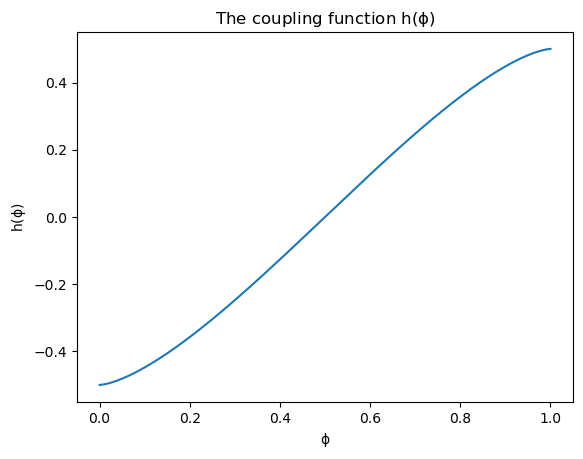

In [12]:

# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the function h(phi) for the phi values
h_values = h(phi_values)

# Plot h(phi) as a function of phi
plt.plot(phi_values, h_values)
plt.xlabel('$\phi$')
plt.ylabel('$h(\phi)$')
plt.title('The coupling function $h(\phi)$')
plt.show()


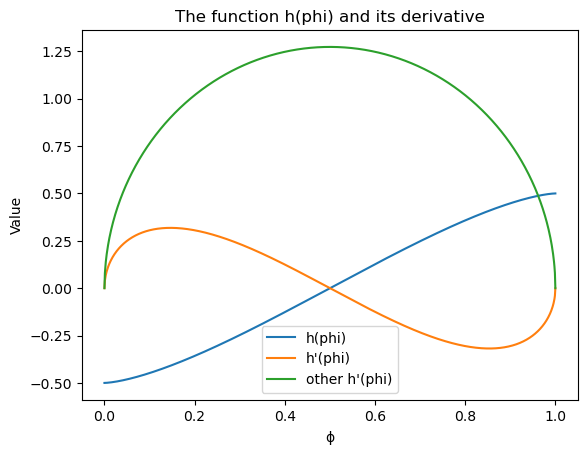

In [13]:

# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))

# Define the derivative of h(phi)
def h_derivative(phi):
    return (1/np.pi) * (4 - 8*phi) * np.sqrt(phi*(1-phi))

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the function h(phi) for the phi values
h_values = h(phi_values)

# Evaluate the derivative of h(phi) for the phi values
h_derivative_values = h_derivative(phi_values)

# Plot h(phi) and its derivative on the same plot
plt.plot(phi_values, h_values, label='h(phi)')
plt.plot(phi_values, h_derivative_values, label="h'(phi)")
plt.plot(phi_values, (8/np.pi)* np.sqrt(phi_values*(1-phi_values)) , label="other h'(phi)")
plt.xlabel('$\phi$')
plt.ylabel('Value')
plt.title('The function h(phi) and its derivative')
plt.legend()
plt.show()


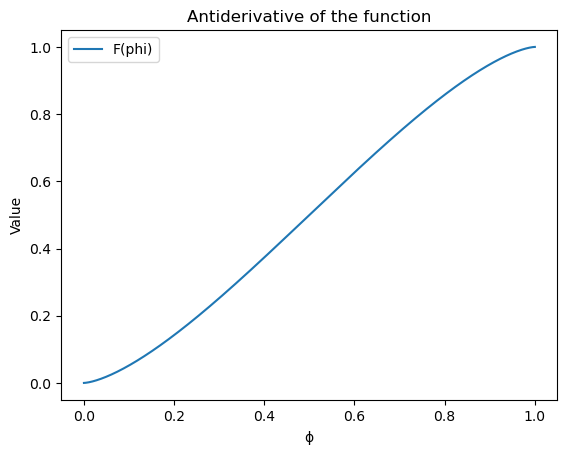

In [14]:
from scipy.integrate import quad

# Define the function f(phi) to integrate
def f(phi):
    return (8/np.pi) * np.sqrt(phi*(1-phi))

# Calculate the antiderivative F(phi) using quad integration
def F(phi):
    return quad(f, 0, phi)[0]

# Create an array of phi values between 0 and 1
phi_values = np.linspace(0, 1, 1000)

# Evaluate the antiderivative F(phi) for the phi values
F_values = np.vectorize(F)(phi_values)

# Plot the antiderivative F(phi)
plt.plot(phi_values, F_values, label='F(phi)')
plt.xlabel('$\phi$')
plt.ylabel('Value')
plt.title('Antiderivative of the function')
plt.legend()
plt.show()


#### Energy functions

In [15]:
def free_energy(eta, phi, sigma, h, delta_g): 
    # Calculate the gradient of phi using central differences
    phi_x, phi_y = np.gradient(phi, axis=(0, 1))
    gradient_phi_squared = phi_x**2 + phi_y**2
        
    # Interfacial energy contribution
    f_int = 4 * sigma / eta * (phi * (1 - phi) + (eta**2 / np.pi**2) * gradient_phi_squared)
    
    # Non-interfacial contribution
    f_non_int = h(phi) * delta_g
    
    # Total free energy
    f = f_int + f_non_int
    
    return np.sum(f), np.sum(f_int), np.sum(f_non_int)


"""
def dphi_dt(phi, mu, sigma, eta, delta_g):
    phi_x = np.gradient(phi, axis=0)
    phi_y = np.gradient(phi, axis=1)
    lap_phi = np.gradient(phi_x, axis=0) + np.gradient(phi_y, axis=1)
    phi_term = np.pi**2 / (2 * eta**2) * (2 * phi - 1)
    
    return mu * (sigma * (lap_phi + phi_term) + dh_dphi(phi,eta) * delta_g)
"""


def energy_derivative(phi, mu, sigma, eta, delta_g,h): 
    phi_dot = dphi_dt(phi, mu, sigma, eta, delta_g)
    grad_phi = np.gradient(phi, axis=(0, 1))
    grad_phi_dot = np.gradient(phi_dot, axis=(0, 1))
    
    term_1_1 = (4 * sigma / eta) * phi_dot * (1 - 2 * phi)
    #term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 *  (np.asarray(grad_phi) * np.asarray(grad_phi_dot)).sum()  
    term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 * np.dot(np.asarray(grad_phi).flatten(), np.asarray(grad_phi_dot).flatten())

    term_2 =dh_dphi(phi,eta) * phi_dot * delta_g
    
    energy_deriv = np.asarray(term_1_1).sum() + term_1_2+ np.asarray(term_2).sum()
    
    return energy_deriv




def compute_residual(eta, phi, sigma, h, delta_g, mu, dx, dy, dF_dt):
    energy_deriv = energy_derivative(phi, mu, sigma, eta, delta_g,h)
    
    # Compute the residual as the absolute difference between the right-hand side and the global energy derivative
    
    residual = np.abs(dF_dt - energy_deriv)
    print("here: ", dF_dt ,energy_deriv)
    
    return residual


In [16]:
def generate_circles(mean_r, num_circles, std, Nx, Ny, Nz):
    # Initialize the arrays for the radii and centers of the circles
    R0 = np.zeros(num_circles)
    X_center = np.zeros(num_circles)
    Y_center = np.zeros(num_circles)
    Z_center = np.zeros(num_circles)

    # Generate the first circle randomly
    R0[0] = np.random.normal(loc=mean_r, scale=std)
    X_center[0] = np.random.randint(R0[0], Nx-R0[0])
    Y_center[0] = np.random.randint(R0[0], Ny-R0[0])
    Z_center[0] = np.random.randint(R0[0], Nz-R0[0])

    # Loop through the remaining circles and generate them one at a time
    for i in range(1, num_circles):
        # Flag to indicate whether the new circle overlaps with any existing circles
        overlaps = True
        while overlaps:
            # Generate the radius and center of the new circle randomly
            R0[i] = np.random.normal(loc=mean_r, scale=std)
            X_center[i] = np.random.randint(R0[i], Nx-R0[i])
            Y_center[i] = np.random.randint(R0[i], Ny-R0[i])
            Z_center[i] = np.random.randint(R0[i], Nz-R0[i])

            # Check the new circle against the existing circles
            overlaps = False
            for j in range(i):
                if np.sqrt((X_center[i]-X_center[j])**2 + (Y_center[i]-Y_center[j])**2 ) < (R0[i]+R0[j]): #+ (Z_center[i]-Z_center[j])**2
                    overlaps = True
                    break
    
    return R0, X_center, Y_center, Z_center

### Phase-Field Resolution

In [17]:
import numpy as np

In [18]:
if __name__ == '__main__':
    # Grid parameters
    
    Nx=64
    Ny=64
    Nt=1500 
    lb = np.array([0, 0,0])
    ub = np.array([1, 1,1500]) 
    dx = (ub[0] - lb[0]) / (Nx - 1)
    dy = (ub[1] - lb[1]) / (Ny - 1)
    # physical parameters
    num_phases=1
    dt = (ub[2] - lb[2]) / (Nt - 1)
    sigma=1
    mu=5e-5
    delta_g= 0 
    eta=7*dx


    # Define the domain bounds
    lb = np.array([0, 0,0])
    ub = np.array([Nx*dx, Ny*dy,Nt*dt]) 

    # Multi-phases
    num_phases=2
    x = np.linspace(lb[0], ub[0], Nx)
    y = np.linspace(lb[1], ub[1], Ny)
    t= np.linspace(lb[2], ub[2], Nt) 
    X, Y, T = np.meshgrid(np.linspace(lb[0], ub[0], Nx),
                            np.linspace(lb[1], ub[1], Ny),
                            np.linspace(lb[2], ub[2], Nt),
                            indexing='ij')

 

In [19]:
from importlib import reload
import pre_post
from pre_post import *
reload(pre_post)
Pre_Post=PrePost(X=X,T=None, lb=lb, ub=ub, Nx=Nx,Ny=Ny,dx=dx,dy=dy,x=x,y=y, eta=eta,\
        phi_true=None)   

In [20]:
R0, X_center, Y_center,Z_center =\
    generate_circles(mean_r=25*dx,num_circles=1, std=0, Nx=Nx, Ny=Ny,Nz=100) #25*dx
X_center=np.array([Nx*dx/2])
Y_center=np.array([Ny*dx/2])

phi_0, X_ini_all=Pre_Post.init_micro_cir(R0,eta, X_center,Y_center, Z_center,Nx,Ny,x,y) 


In [21]:
"""
T_ch=eta**2 /(sigma*mu)
x=x/eta
y=y/eta
t=t/T_ch 
dt =dt /T_ch 
dx=dx/eta
dy=dy/eta
R0=R0/eta
delta_g=eta*delta_g
lb[0], ub[0]=lb[0]/eta, ub[0]/eta
lb[1], ub[1]= lb[1]/eta, ub[1]/eta
lb[2], ub[2]= lb[2]/T_ch, ub[2]/T_ch
ub=ub/eta
eta=1
sigma=1
mu=1
"""

'\nT_ch=eta**2 /(sigma*mu)\nx=x/eta\ny=y/eta\nt=t/T_ch \ndt =dt /T_ch \ndx=dx/eta\ndy=dy/eta\nR0=R0/eta\ndelta_g=eta*delta_g\nlb[0], ub[0]=lb[0]/eta, ub[0]/eta\nlb[1], ub[1]= lb[1]/eta, ub[1]/eta\nlb[2], ub[2]= lb[2]/T_ch, ub[2]/T_ch\nub=ub/eta\neta=1\nsigma=1\nmu=1\n'

(2, 64, 64)


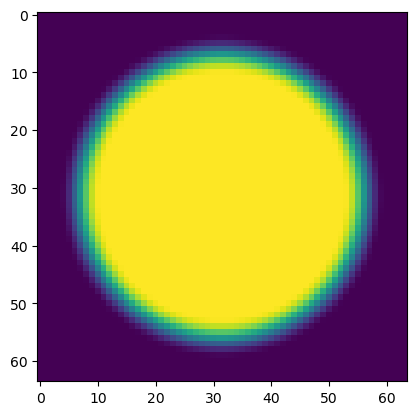

In [22]:
all_phases =np.asarray([phi_0,1-phi_0])
print(all_phases.shape)
plt.imshow(all_phases[0])

In [23]:
Phi = np.copy(all_phases)

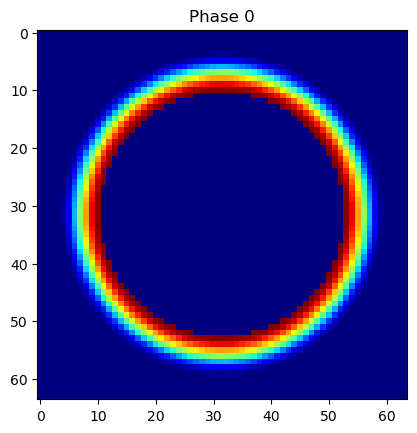

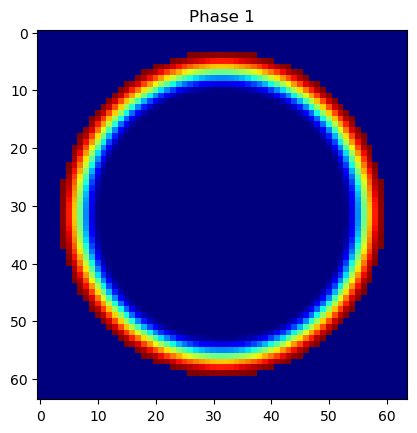

In [24]:
all_interfaces =[]
# Assuming Phi has shape (4, 101, 101)
num_phases, height, width = Phi.shape

# Iterate through each phase in Phi
sum_interfaces=np.zeros((Nx, Ny)) 
for phase_idx in range(num_phases):
    interface= np.zeros((Nx, Ny)) 
    phase = Phi[phase_idx]
    
    for i in range(Nx):
        for j in range(Ny):
            if 0 < phase[i, j] <1:
                interface[i, j] = phase[i, j]

    # Create a mask for the interface (0 < phi < 1)
    interface_mask = np.logical_and(phase > 0, phase < 1)
    
    # Plot the interface for this phase
    plt.imshow(interface, cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)
    plt.title(f'Phase {phase_idx}')
    plt.show()
    
    # Add the interface to the sum
    all_interfaces.append(interface)
    sum_interfaces += interface
all_interfaces=np.asarray(all_interfaces)
# Plot the sum of interfaces
#plt.imshow(sum_interfaces, cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)
#plt.title('Sum of Interfaces')
# Display the plots
#plt.show()


In [25]:
all_phases.shape, all_interfaces.shape

((2, 64, 64), (2, 64, 64))

In [26]:
Initilization_Data = {'all_phases': all_phases,\
    'all_interfaces': all_interfaces}
np.savez('Initilization_Data_dual.npz', **Initilization_Data)

In [27]:
import numpy as np

def Sigma_(phi_alpha, phi_beta, Sigma_ab):
    # Calculate the interface energy based on the given parameters
    #diff_phi = phi_beta - phi_alpha
    interface_energy = Sigma_ab #* (diff_phi ** 2)

    return interface_energy

def h_term(phi_alpha,phi_beta, eta):
    #phi_alpha=np.clip(phi_alpha, 0, 1)
    #phi_beta=np.clip(phi_beta, 0, 1)
    square_root_term = np.sqrt(phi_alpha * phi_beta)
    return np.pi / eta * square_root_term

def I_phi(lap_phi_alpha, phi_alpha, Prefactor):
    return (lap_phi_alpha + Prefactor * phi_alpha)

def Laplacian(phi):
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx*dy)
    return laplacian

def update_phi(phi, mu, sigma, eta, delta_g, dt, dx):
    phi_new=np.copy(phi)
    Prefactor=np.pi**2 / eta**2
    correction = 1.0 + 2.0/eta**2
    num_phases = phi.shape[0]
    sum_phases=np.zeros((Nx, Ny))

    for alpha in range(num_phases):
        sum_term=np.zeros_like(phi_new[alpha] )
        num_phases = phi.shape[0]
        lap_phi_alpha = Laplacian(phi[alpha])
        I_alpha = I_phi(lap_phi_alpha, phi[alpha], Prefactor)

        for beta in range(num_phases):
            if beta != alpha:
                lap_phi_beta = Laplacian(phi[beta])
                I_beta = I_phi(lap_phi_beta, phi[beta],Prefactor)
                sigma_ab = Sigma_(phi[alpha], phi[beta], sigma)
                sum_term += sigma_ab * (I_alpha - I_beta)

                if num_phases>2:
                    for gamma in range(num_phases):
                        if gamma != alpha and gamma != beta:
                            sigma_bg = Sigma_(phi[beta], phi[gamma], sigma)
                            sigma_ag = Sigma_(phi[alpha], phi[gamma], sigma)
                            lap_phi_gamma = Laplacian(phi[gamma])
                            I_gamma = I_phi(lap_phi_gamma, phi[gamma], np.pi**2 / eta**2)
                            sum_term -= (sigma_bg - sigma_ag) * (I_gamma)
                            
                dPsi_dt=(sum_term ) #*correction* (1/junctions)  h_term(phi[alpha],phi[beta], eta)* delta_g
                
                if beta > alpha:
                    dPsi_dt = dPsi_dt
                #dPsi_dt=add_asym(phi_new[alpha], phi_new[beta], dPsi_dt)
                
        phi_new[alpha] +=   dt *(mu/num_phases) * dPsi_dt 

        phi_new[alpha] = np.clip( phi_new[alpha], 0, 1)
        sum_phases+=phi[alpha]    
        
    corrected_sum_phases=np.zeros((Nx, Ny))    
    for alpha in range(num_phases):
        phi_new[alpha]/=sum_phases
        corrected_sum_phases+=phi_new[alpha]
    #print(corrected_sum_phases.min(),corrected_sum_phases.max())       
    Phi_t_new=(phi_new-phi)/dt
                
    return phi_new,Phi_t_new 

# Given input parameters
num_phases = len(all_phases)


# Initialize phi with random values
Phi = np.copy(all_phases) 
print(Phi.shape)
all_Phi=[] 
all_Phi_t=[]
# Perform time-stepping
for step in range(Nt):
    Phi_new, Phi_t_new = update_phi(Phi, mu, sigma, eta, delta_g, dt, dx) 
    all_Phi.append(Phi_new)
    all_Phi_t.append(Phi_t_new)
    Phi=Phi_new
    if (step + 1) % 1000 == 0:
        print(f"Step {step + 1} completed")

print("Final phi:", Phi.shape)


(2, 64, 64)
Step 1000 completed
Final phi: (2, 64, 64)


In [28]:
Nx,Ny,mu, sigma, eta, delta_g, dt, Nt

(64, 64, 5e-05, 1, 0.1111111111111111, 0, 1.0006671114076051, 1500)

In [29]:
all_phases.shape, len(all_Phi)


((2, 64, 64), 1500)

In [30]:
all_Phi=np.asarray(all_Phi)
all_Phi_t=np.asarray(all_Phi_t)
all_Phi.shape , all_Phi_t.shape


((1500, 2, 64, 64), (1500, 2, 64, 64))

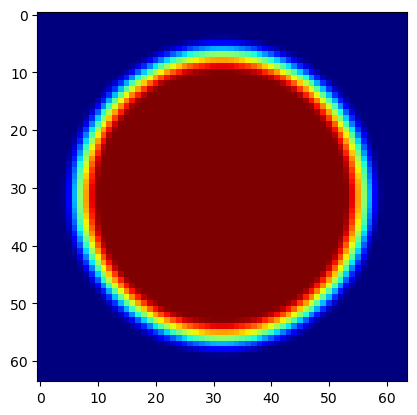

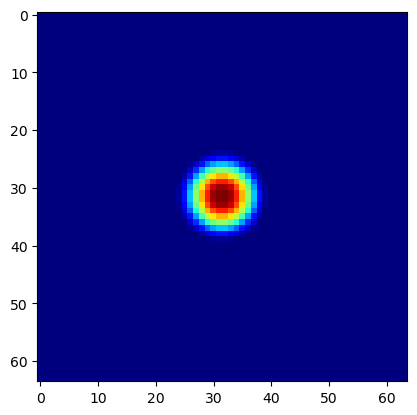

In [31]:
plt.imshow(all_phases[0], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)
plt.show()
plt.imshow(all_Phi[-1,0], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1)

In [32]:
import cv2
import torch
def compute_laplacian(img, ksize, delta_x=1.0, delta_y=1.0):
    """
    Compute the Laplacian of an image using OpenCV's separable filters,
    scaled by the grid spacings delta_x and delta_y.
    """
    deriv_kx2, _ = cv2.getDerivKernels(dx=2, dy=0, ksize=ksize, normalize=True)
    _, deriv_ky2 = cv2.getDerivKernels(dx=0, dy=2, ksize=ksize, normalize=True)
    
    deriv_kx2 = np.divide(deriv_kx2, delta_x**2)  # Scale by delta_x squared
    deriv_ky2 = np.divide(deriv_ky2, delta_y**2)  # Scale by delta_y squared

    if isinstance(img, torch.Tensor):
        img = img.numpy()
    
    grad_x2 = cv2.sepFilter2D(img, cv2.CV_64F, deriv_kx2, np.array([[1]], dtype=np.float32))
    grad_y2 = cv2.sepFilter2D(img, cv2.CV_64F, np.array([[1]], dtype=np.float32), deriv_ky2)
    
    laplacian = grad_x2 + grad_y2
    return laplacian            
    
    
def compute_laplacian_batch(batch, ksize=5, delta_x=1.0, delta_y=1.0):
    """
    Compute the Laplacian for a batch of images.
    """
    batch_size, channels, height, width = batch.shape
    laplacian_batch = torch.empty_like(batch)

    for i in range(batch_size):
        for j in range(channels):
            img = batch[i, j].cpu().detach().numpy()
            laplacian = compute_laplacian(img, ksize, delta_x, delta_y)
            laplacian_batch[i, j] = torch.tensor(laplacian, dtype=torch.float32)

    return laplacian_batch  

In [33]:

# start simulation
import time 
t_start = time.time() 


# set fourier coefficient 
"""
kx,ky,k2,k4=prepar_fft(Nx,   #Nx,dx,ax,bx,Ny,dy,ay,by,opt
dx_s,   # dx_s
0,
leng_s, #leng_s
Nx,
dx_s,
0,
leng_s,
"2d")
"""
# ----------------------------------------------------
def free_energy(eta, phi, sigma, h, delta_g): 
    # Calculate the gradient of phi using central differences
    phi_x, phi_y = np.gradient(phi, axis=(0, 1))
    gradient_phi_squared = phi_x**2 + phi_y**2
        
    # Interfacial energy contribution
    f_int = 4 * sigma / eta * (phi * (1 - phi) + (eta**2 / np.pi**2) * gradient_phi_squared)
    
    # Non-interfacial contribution
    f_non_int = - h(phi) * delta_g
    
    # Total free energy
    f = f_int + f_non_int
    
    return np.sum(f), np.sum(f_int), np.sum(f_non_int)
# ----------------------------------------------------
def dh_dphi(phi, eta):
    return (8/np.pi) * np.sqrt(phi*(1-phi))
# ----------------------------------------------------
# Define the function h(phi)
def h(phi):
    return (1/np.pi) * ((4*phi-2) * np.sqrt(phi*(1-phi)) + np.arcsin(2*phi-1))
"""
# ----------------------------------------------------
def compute_phi_dot(phi, mu, sigma, eta, delta_g, dx):
    phi_dot = np.zeros_like(phi)
    # Calculate the Laplacian term using np.roll for efficient shifting
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)
    for i in range(1, phi.shape[0]-1):
        for j in range(1, phi.shape[1]-1):
            phi_dot[i,j] = mu * (sigma * (laplacian[i,j] + np.pi**2 / (2*eta**2) * (2*phi[i,j] - 1)) -
                                 np.pi * np.sqrt(phi[i,j] * (1 - phi[i,j])) / eta * delta_g)
    
    return phi_dot

# ----------------------------------------------------
#@jit(nopython=True)
"""
def update_phi(phi, mu, sigma, eta, delta_g, dt, dx,step):
    #phi = np.clip(phi, 0, 1)
    phi_new = np.zeros_like(phi)
    
    # Calculate the Laplacian term using finite difference approximations
    laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
                 np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)
    phi_tensor=torch.tensor(phi).unsqueeze(0).unsqueeze(0)
    #laplacian =compute_laplacian_batch(phi_tensor, ksize=5, delta_x=dx, delta_y=dx).squeeze(0).squeeze(0).numpy()
    # Define the function h(phi)
    def h_term(phi, eta):
        square_root_term = np.sqrt(phi * (1 - phi))
        return np.pi / eta * square_root_term

    # Update the values of phi
    phi_new = phi + dt * mu * (sigma * (laplacian + np.pi**2 / (2 * eta**2) * (2 * phi - 1)) +
                              0) #h_term(phi, eta) * delta_g
    #print(f"Before Time step = {step}: phi_min  = {phi_new.min()}: phi_max  = {phi_new.max() }")
    phi_new = np.clip(phi_new, 0, 1)
    phi_t=(phi_new-phi)/dt
    #
    
    phi_t_min = np.min(phi_t)
    phi_t_max = np.max(phi_t)
    right_side_eqn= mu * (sigma * (laplacian + np.pi**2 / (2* eta**2) * (2 * phi - 1)) +
                              0) #h_term(phi, eta) * delta_g
    right_side_eqn_min = np.min(right_side_eqn)
    right_side_eqn_max = np.max(right_side_eqn)
    #print(f"Time step = {step}: phi_t min = {phi_t_min}, max = {phi_t_max}; right_side_eqn min = {right_side_eqn_min}, max = {right_side_eqn_max}")
    f_phi = phi_t - right_side_eqn
    #print(f"Time step = {step}: phi_t min = {phi_t_min}, max = {phi_t_max}")
    #print(f"After Time step = {step}: phi_min  = {phi_new.min()}: phi_max  = {phi_new.max()}")
    #print(f"Time step = {step}: f_phi_min  = {f_phi.min()}: f_phi_max  = {f_phi.max()}")
    #stop
    
    #print(f"Time step = {step}: right_side_eqn  = {right_side_eqn}")
    RSE=  dt * mu * sigma * (laplacian + (np.pi**2 / (2 * eta**2)) * (2 * phi - 1) )
    return phi_new,phi_t, RSE


def compute_phi_dot(phi, mu, sigma, eta, delta_g, dx):
    phi_dot = np.zeros_like(phi)

    # Calculate the gradients using finite difference approximations
    grad_x = (phi[2:, 1:-1] - phi[:-2, 1:-1]) / (2 * dx)
    grad_y = (phi[1:-1, 2:] - phi[1:-1, :-2]) / (2 * dx)

    # Calculate the Laplacian term using finite difference approximations
    laplacian = (phi[:-2, 1:-1] + phi[2:, 1:-1] +
                 phi[1:-1, :-2] + phi[1:-1, 2:] - 4 * phi[1:-1, 1:-1]) / (dx**2)

    for i in range(1, phi.shape[0]-1):
        for j in range(1, phi.shape[1]-1):
            phi_dot[i, j] = mu * (sigma * (laplacian[i-1, j-1] + np.pi**2 / (2 * eta**2) * (2 * phi[i, j] - 1)) +
                                  np.pi * np.sqrt(phi[i, j] * (1 - phi[i, j])) / eta * delta_g)

    return phi_dot


# ----------------------------------------------------
def phi_term(phi, mu, sigma, eta, delta_g): 
    phi_dot = compute_phi_dot(phi, mu, sigma, eta, delta_g, dx)
    grad_phi = np.gradient(phi, axis=(0, 1))
    grad_phi_dot = np.gradient(phi_dot, axis=(0, 1))
    
    term_1_1 = (4 * sigma / eta) * phi_dot * (1 - 2 * phi)
    term_1_2 = (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 *  (np.asarray(grad_phi) * np.asarray(grad_phi_dot))
    #term_1_2 =  (4 * sigma / eta) * (eta**2 / np.pi**2) * 2 * np.dot(np.asarray(grad_phi), np.asarray(grad_phi_dot)).sum()

    term_2 = -dh_dphi(phi,eta) * phi_dot * delta_g
    
    phi_term_ = np.asarray(term_1_1).sum() + term_1_2.sum() + np.asarray(term_2).sum()
    return phi_term_



res =[]
out_phi = []  # to store phi arrays
out_phi_t = [] 
out_t = []         # to store time steps
out_area_vs_t=[]
out_t_vs_phi = []  # to store t,phi arrays
out_energy=[]
out_res=[]
out_time=[]
t=0

#fileOut_path="out_file_"+str(Nx)+".txt"

# initialization
phi=phi_0

for istep in range(Nt): # nstep
        
    # Fourier transform
    #f=free_energy(phi)                    # =  compute free energy
    #phik=np.fft.fft2(phi)                 # = 2d ftt of eta
    #fk=np.fft.fft2(f)                     # = 2d ftt of f
        
    #phik=  phi + dt*mu*sigma*(laplacian*phi + pi2_over_2eta2*(phi-0.5) + h_phi_delta_g) / denom# = solve equation in fourier space
    #phik=np.real(np.fft.ifft2(phik))       # = get the result in real space 
    phi,phi_t,RSE = update_phi(phi, mu, sigma, eta, delta_g, dt, dx,istep)
    #phi = np.clip(phi, 0, 1)
    

    energy,f_int,f_non_int=free_energy(eta, phi,sigma, h, delta_g)
    out_energy.append([energy,f_int , f_non_int])
    out_time.append(t)
    array_F=np.asarray(out_energy)[:,0]
    
    
    #"""
    #if  (istep+1) % 100 == 0:
    area_vs_t = (len(phi[phi > 0]))
    out_area_vs_t.append([t, area_vs_t])
    out_phi.append(phi)  # store phi only
    out_phi_t.append(phi_t)
    out_t.append(t)         
    #print("istep: {:}, time: {:.2f}, Area: {:.3f}\n".format(istep, t, area_vs_t))
    #"""

    
    if istep>2:
        x = out_time # x-coordinates for spline interpolation
        y = np.asarray(out_energy)[:, 0] # y-coordinates for spline interpolation
        #dx = x[1] - x[0]  # Assuming uniform spacing
        #dy = np.diff(y)
        #print(x,y)
        # Generate smooth spline curve
        #spl = make_interp_spline(x, y)
        #derivative = spl.derivative(nu=1)(t)

        
        #derivative = np.gradient(np.diff(y), x[1] - x[0] )[-1]

        derivative=(np.asarray(out_energy)[:, 0][-1]-np.asarray(out_energy)[:, 0][-3]) /(2*dt)
        
        phi_dot = compute_phi_dot(phi, mu, sigma, eta, delta_g, dx)
        #phi_dot_norm = np.linalg.norm(phi_dot,ord=2)
        #print(derivative,phi_dot_norm)
        
        phi_term_=phi_term(phi, mu, sigma, eta, delta_g)
        energy_residual = np.abs(np.abs(derivative) - np.abs(phi_term_))
        phi_sum=phi.sum()/Nx**2
        
        if (istep+1) % 100 == 0:
            #print("istep: {:2f}, derivative: {:.3e}, phi_term: {:.3e}, phi_sum: {:.3e}\n".format(t, derivative, phi_term_,phi_sum))
            print("istep: {:2f}, residual: {:.3e}\n".format(t, np.mean(abs(phi_t- RSE))))
    
        #print("istep {},  Energy derivative {:.2e}, phi_dot term {:.2e}, Energy residual {:.2e}\n".format(istep, derivative, phi_term, energy_residual))
        out_res.append([energy_residual,derivative,phi_term_])
    
        #print("Derivative: {:.2e}".format(derivative))
        #print("phi_dot_norm^2: {:.2e}".format(phi_term))
        #print("Residual: {:.2e}".format(energy_residual))
        
        #plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        #plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
        """
        plt.plot(x, y, "k", label=r"$Enery$", linestyle='--')
        plt.plot(x, spl(x), "g", label="Spline Curve")

        # Plot tangent line at the specified time
        tangent_x = np.array([t-dt, t+dt])  # X-coordinates for tangent line
        tangent_y = spl(t) + derivative * (tangent_x - t)  # Y-coordinates for tangent line
        plt.plot(tangent_x, tangent_y, "r", label="Tangent Line")
        #tangent_x = np.array([time-1, time+1])  # X-coordinates for tangent line
        #tangent_y = spl(time) + derivative * (tangent_x - time)  # Y-coordinates for tangent line

        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Energy", fontsize=12)
        plt.title('Energy vs. Time', fontsize=12)
        plt.legend()

        plt.show()
        """
        
        #time.sleep(100)
        
    
    t+=dt
        
t_end = time.time() 

istep: 99.066044, residual: 1.490e-02

istep: 199.132755, residual: 1.508e-02

istep: 299.199466, residual: 1.527e-02

istep: 399.266177, residual: 1.546e-02

istep: 499.332889, residual: 1.566e-02

istep: 599.399600, residual: 1.587e-02

istep: 699.466311, residual: 1.608e-02

istep: 799.533022, residual: 1.632e-02

istep: 899.599733, residual: 1.656e-02

istep: 999.666444, residual: 1.682e-02

istep: 1099.733155, residual: 1.712e-02

istep: 1199.799867, residual: 1.744e-02

istep: 1299.866578, residual: 1.783e-02

istep: 1399.933289, residual: 1.828e-02

istep: 1500.000000, residual: 1.895e-02



In [34]:
def extract_interfacial_regions(input,lower_bound=0.0, upper_bound=1): #
    """
    Extracts the part of both predicted and true tensors where the true values lie between specified bounds.
    
    Args:
    predicted (torch.Tensor): The predictions from your model.
    true (torch.Tensor): The ground truth tensor.
    lower_bound (float): The lower bound of the interfacial region.
    upper_bound (float): The upper bound of the interfacial region.
    
    Returns:
    Tuple[torch.Tensor, torch.Tensor]: Tensors of predicted and true values in the interfacial regions.
    """
    mask = (input >=  lower_bound) & (input <= upper_bound)
    return np.argwhere(mask)#torch.nonzero(mask, as_tuple=True)

In [35]:
max_res=0
cumulative_mse = 0
epsilon=1e-3
for t in range(Nt-1):
    phi = out_phi[t]+epsilon * np.random.randn(*out_phi[t].shape)
    residual=np.zeros_like(phi)
    phi_next = out_phi[t+1]
    phi_t = (phi_next - phi) / dt
    phi_tensor=torch.tensor(phi).unsqueeze(0).unsqueeze(0)
    

    # Calculate the Laplacian term
    #laplacian = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) +
    #             np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)
    laplacian =compute_laplacian_batch(phi_tensor, ksize=5, delta_x=dx, delta_y=dx).squeeze(0).squeeze(0).numpy()
        
    # Calculate the right-hand side equation
    right_side_eqn = mu * sigma * (laplacian + np.pi**2 / (2 * eta**2) * (2 * phi - 1))

    # Calculate the unconstrained phi_new
    phi_new_unclipped = phi + dt * right_side_eqn

    # Apply physical constraints
    phi_new = np.clip(phi_new_unclipped, 0, 1)

    interface_indexes=extract_interfacial_regions(phi,lower_bound=0.05, upper_bound=0.95)
        
    # Adjust the residual calculation to account for clipping

    residual = phi_t- right_side_eqn #np.where((phi_new_unclipped < 0) | (phi_new_unclipped > 1), 0, phi_t - right_side_eqn)

    if t==0:
        res_ini=residual
    
    residual-=res_ini

    mse = np.mean(residual**2)
    cumulative_mse += mse
        
    # Print shapes for debugging
    """
    if t % 500 == 0: # 
        print("phi shape:", phi.shape)
        print("phi_t shape:", phi_t.shape)
        print("laplacian shape:", laplacian.shape)
        print("right_side_eqn shape:", right_side_eqn.shape)
    """
    
    # Calculate min and max values
    phi_t_min = phi_t.min() 
    phi_t_max = phi_t.max()
    right_side_eqn_min = right_side_eqn.min()
    right_side_eqn_max = right_side_eqn.max()

    max_res = max(max_res, np.max(np.abs(residual)))

    if t % 500 == 0:  # Note: this condition might not be met often if Nt is small
        #print(f"Time step = {t}: residual min = {residual_min}, residual max = {residual_max}")
        print(f"MSE: {mse}")
        #plt.imshow(phi_new)
        #plt.show()
        
mean_mse = cumulative_mse / (Nt - 1)        
print(f"Cumulative MSE: {cumulative_mse}")
print(f"Mean MSE: {mean_mse}")
print(f"Max Residual: {max_res}")

MSE: 0.0
MSE: 0.0003053641403196421
MSE: 0.00033125354914280425
Cumulative MSE: 0.479931498517252
Mean MSE: 0.0003201677775298546
Max Residual: 0.024576137264174076


In [36]:
dt

1.0006671114076051

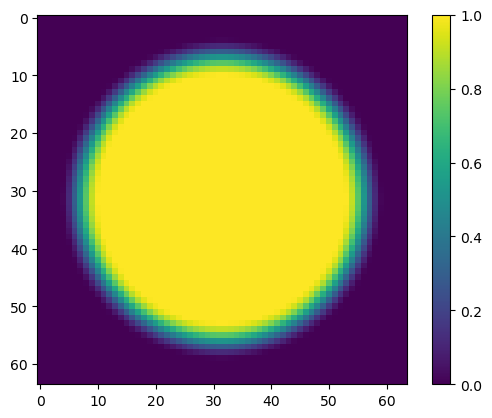

In [37]:
plt.imshow(all_Phi[0,0])
plt.colorbar()

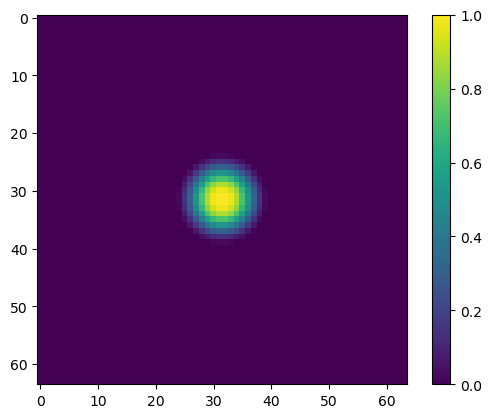

In [38]:
plt.imshow(all_Phi[-1,0])
plt.colorbar()

In [39]:
test_phi=np.asarray(out_phi[:500] ) # 
test_phi = np.expand_dims(test_phi, axis=1)
print(test_phi.shape)
laplacian_phi_test = (np.roll(test_phi, shift=1, axis=2) + np.roll(test_phi, shift=-1, axis=2) +
            np.roll(test_phi, shift=1, axis=3) + np.roll(test_phi, shift=-1, axis=3) - 
             4 * test_phi) / (dx * dy)

print(laplacian_phi_test.shape)
right_side_eqn = mu * (sigma * (laplacian_phi_test  + np.pi**2 / (2 * eta**2) * (2 * test_phi - 1)))
right_side_eqn=right_side_eqn[1:] 
print("right_side_eqn", right_side_eqn.shape)

phi_test_t = np.zeros_like(test_phi)
for i in range(len(test_phi) - 1):
    phi_test_t[i] = (test_phi[i + 1] - test_phi[i]) / dt
phi_test_t[-1] = (test_phi[-1] - test_phi[-2]) / dt
phi_test_t = (test_phi[1:] - test_phi[:-1]) / dt
print(phi_test_t.shape)

f_phi = phi_test_t - right_side_eqn
print(phi_test_t.shape)
mse_f_phi  =  np.mean(abs(f_phi)) #np.mean(f_phi**2)#
print("MSE for f_phi:", mse_f_phi)
max_res = np.max(f_phi)
print("max_res:", max_res)

(500, 1, 64, 64)
(500, 1, 64, 64)
right_side_eqn (499, 1, 64, 64)
(499, 1, 64, 64)
(499, 1, 64, 64)
MSE for f_phi: 0.015174761089999569
max_res: 0.01998594891220595


In [40]:
test_phi=np.asarray(all_Phi[1:500,0] ) # out_phi[1:500]
test_phi = np.expand_dims(test_phi, axis=1)
print(test_phi.shape)
laplacian_phi_test = (np.roll(test_phi, shift=1, axis=2) + np.roll(test_phi, shift=-1, axis=2) +
            np.roll(test_phi, shift=1, axis=3) + np.roll(test_phi, shift=-1, axis=3) - 
             4 * test_phi) / (dx * dy)

print(laplacian_phi_test.shape)
right_side_eqn = mu * (sigma * (laplacian_phi_test  + np.pi**2 / (2 * eta**2) * (2 * test_phi - 1)))
right_side_eqn=right_side_eqn[1:] 
print(right_side_eqn.shape)
phi_test_t=(test_phi[1:] - test_phi[:-1]) / dt
print(phi_test_t.shape)
f_phi = phi_test_t - right_side_eqn
print(phi_test_t.shape)
mse_f_phi =  np.mean(abs(f_phi))#np.mean(f_phi**2)# np.mean(abs(f_phi))
print("MAE for f_phi:", mse_f_phi)
max_res = np.max(f_phi)
print("max_res:", max_res)


(499, 1, 64, 64)
(499, 1, 64, 64)
(498, 1, 64, 64)
(498, 1, 64, 64)
(498, 1, 64, 64)
MAE for f_phi: 0.015175619218065496
max_res: 0.01998594891220595


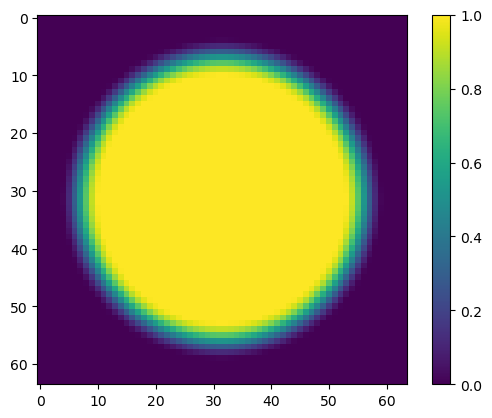

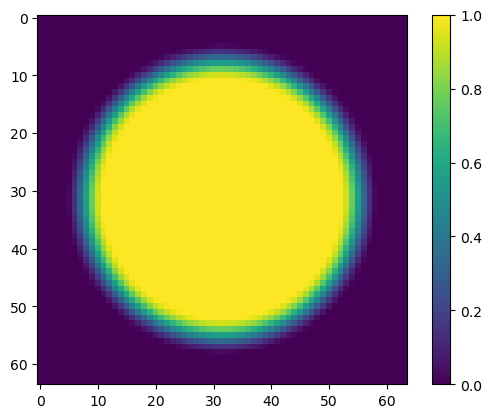

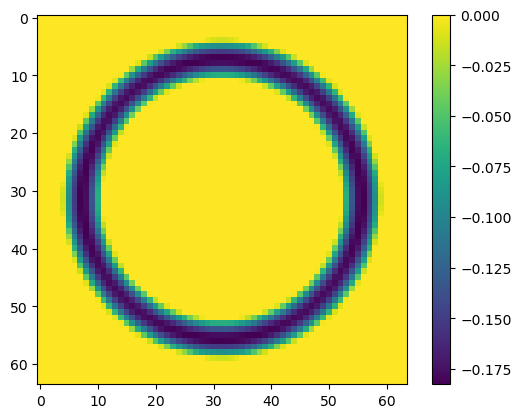

In [41]:
plt.imshow(all_Phi[0,0])
plt.colorbar()
plt.show()
plt.imshow(all_Phi[100,0])
plt.colorbar()
plt.show()
plt.imshow(all_Phi[100,0]-all_Phi[0,0])
plt.colorbar()
plt.show()

(30, 64, 64)


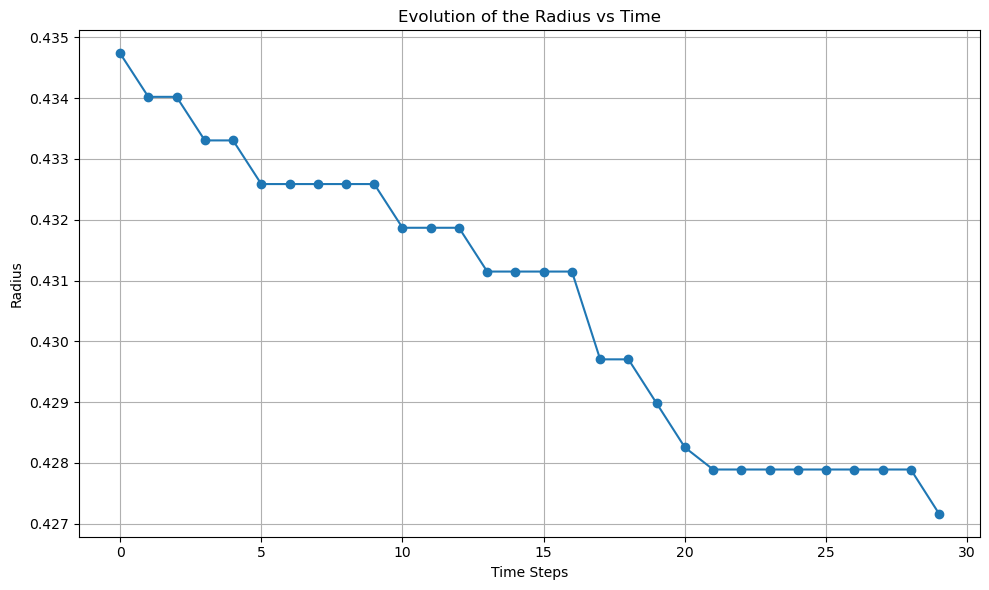

In [42]:
out_phi_np=np.asarray(out_phi[:30])
print(out_phi_np.shape)
radius_vs_time = []
for t in range(out_phi_np.shape[0]):
    area = np.sum(out_phi_np[t] > 1e-3).item()
    radius = np.sqrt(area / (Nx * Ny) / np.pi)
    radius_vs_time.append(radius)

# Plot the radius vs time
plt.figure(figsize=(10, 6))
plt.plot(range(len(radius_vs_time)), radius_vs_time, marker='o', linestyle='-')
plt.xlabel('Time Steps')
plt.ylabel('Radius')
plt.title('Evolution of the Radius vs Time')
plt.grid(True)
plt.tight_layout()
plt.show()




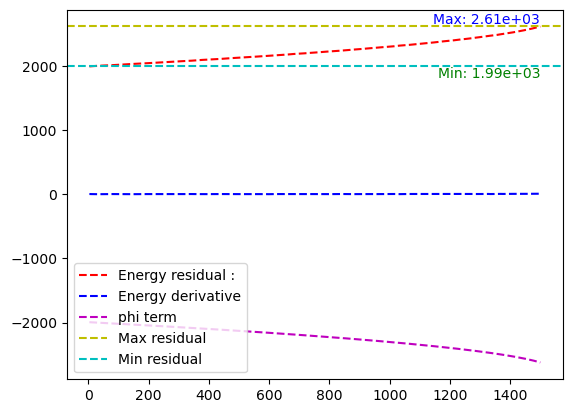

In [43]:
plt.plot(out_time[3:], np.asarray(out_res)[:, 0] , "r--", label="Energy residual : ")
plt.plot(out_time[3:],-np.asarray(out_res)[:, 1] , "b--", label="Energy derivative")
plt.plot(out_time[3:],np.asarray(out_res)[:, 2] , "m--", label="phi term")
residual = np.abs(np.asarray(out_res)[:, 0])
max_residual = np.max(residual)
min_residual = np.min(residual)
plt.axhline(y=max_residual, color="y", linestyle="--", label="Max residual")
plt.axhline(y=min_residual, color="c", linestyle="--", label="Min residual")
plt.text(out_time[-1], max_residual, f"Max: {max_residual:.2e}", color="b", ha="right", va="bottom")
plt.text(out_time[-1], min_residual, f"Min: {min_residual:.2e}", color="g", ha="right", va="top")
plt.legend()

plt.show()

In [44]:
mu,sigma,eta

(5e-05, 1, 0.1111111111111111)

In [45]:
all_Phi.shape

(1500, 2, 64, 64)

# Results

In [46]:
out_phi, out_t, out_phi_t= np.asarray(out_phi), np.asarray(out_t),np.asarray(out_phi_t)
out_phi[0].shape , out_phi_t.shape


((64, 64), (1500, 64, 64))

NameError: name 'make_interp_spline' is not defined

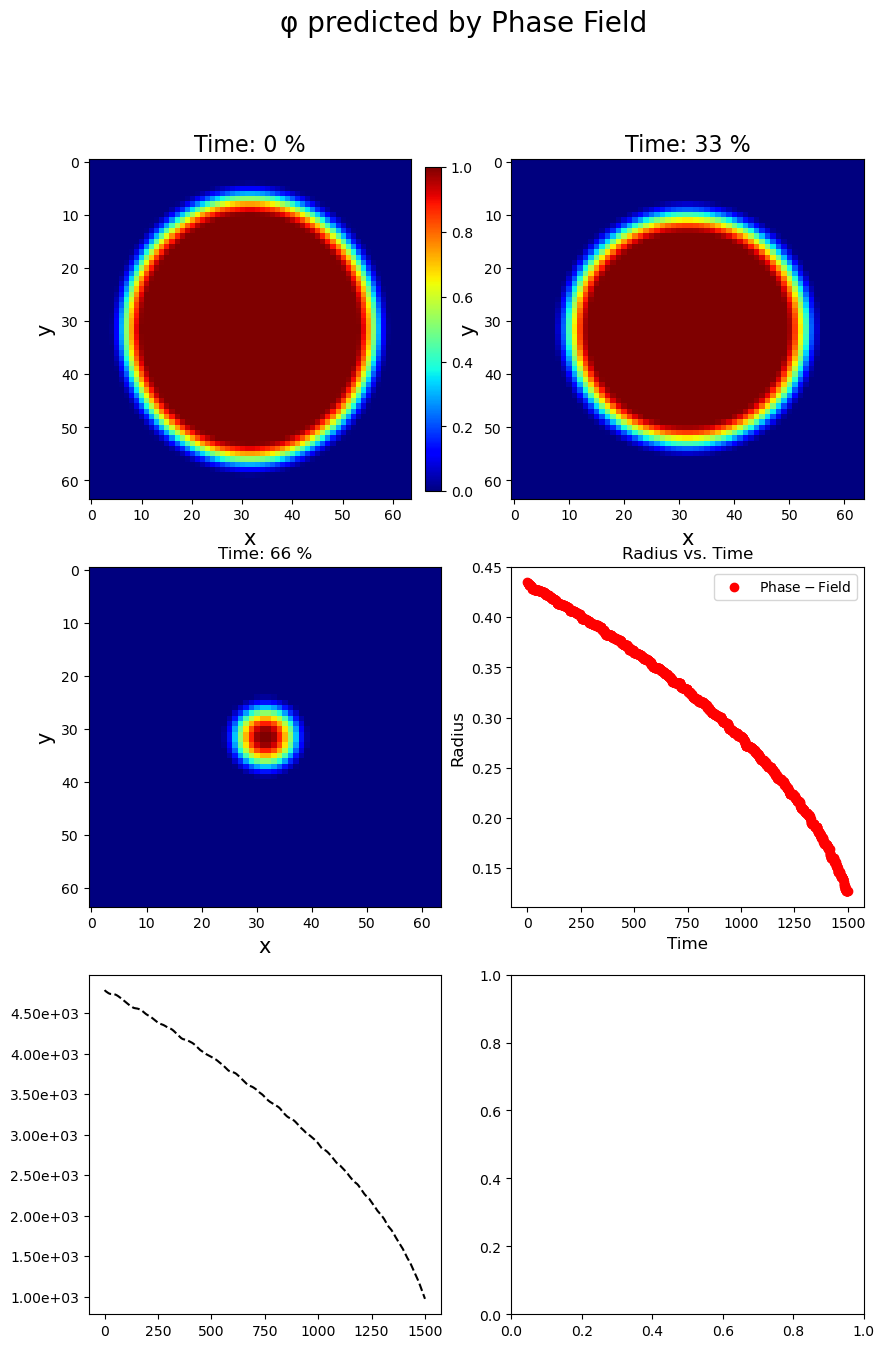

In [47]:
import matplotlib.ticker as ticker
#import spl
# Initialize array for R values
R = np.zeros(Nt)

# Set initial condition
R[0] = R0+eta/2

# Finite difference scheme
for n in range(Nt-1):
    R[n+1] = R[n] + dt *mu * (-sigma / R[n] + delta_g)

# Plotting
t = np.linspace(0, 1, Nt)

raduis_FD=R

# Extract the area and time data from the out_area_vs_t list of lists
time = np.transpose(out_area_vs_t)[0]
area_area = np.transpose(out_area_vs_t)[1]
tot_energy=np.asarray(out_energy)


fig, ax = plt.subplots(3, 2, figsize=(10, 15))  # Adjust the figsize as needed
fig.subplots_adjust(hspace=0.2, wspace=0.2)  # Adjust the spacing between subplots
title = "φ predicted by Phase Field"
fig.suptitle(title, fontsize=20)


# Plot phi at regular intervals
im = ax[0,0].imshow(out_phi[0], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
ax[0,0].set_xlabel("x",fontsize = 15)
ax[0,0].set_ylabel("y",fontsize = 15)
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].set_title(f'Time: {0} %', fontsize=16)

im = ax[0,1].imshow(out_phi[400], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
plt.colorbar(im,ax=ax[0,0],fraction=0.046, pad=0.04)
ax[0,1].set_xlabel("x",fontsize = 15)
ax[0,1].set_ylabel("y",fontsize = 15)
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('y')
ax[0,1].set_title(f'Time: {33} %', fontsize=16)

im = ax[1,0].imshow(out_phi[-1], cmap=plt.get_cmap('jet'), interpolation='none', vmin=0, vmax=1,aspect='auto')
ax[1,0].set_xlabel("x",fontsize = 15)
ax[1,0].set_ylabel("y",fontsize = 15)
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('y')
ax[1,0].set_title(f'Time: {66} %', fontsize=12)

# Plot Radius vs time
ax[1, 1].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[1, 1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[1,1].plot(np.transpose(out_area_vs_t)[0],np.sqrt(area_area/Nx**2/np.pi),"r",label=r"$Phase-Field$",linestyle=' ',marker='o')
#ax[1,1].plot(np.transpose(out_area_vs_t)[0],R_th,"g",label=r"$Theory$",linestyle=' ',marker='o')
#ax[1,1].plot(np.linspace(0,1,len(raduis_FD)),raduis_FD, "black",label=r"$Analytical$")
ax[1,1].set_xlabel("Time",fontsize = 12)
ax[1,1].set_ylabel("Radius",fontsize = 12)
ax[1,1].set_title('Radius vs. Time', fontsize=12)
ax[1,1].legend()


# plot the enery evolution
ax[2,0].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[2, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e'))
ax[2,0].plot(out_time,tot_energy[:,0] ,"k",label=r"$Total Energy $",linestyle='--')
#ax[2,0].plot(area_time,tot_energy[:,1] ,"b",label=r"$Curvature-driven$",linestyle='--')
#ax[2,0].plot(tot_energy[:,2] ,"r",label=r"$Driving-force$",linestyle='--')
xx = out_time  # x-coordinates for spline interpolation
yy = tot_energy[:, 0]  # y-coordinates for spline interpolation
# Generate smooth spline curve
spl_ = make_interp_spline(xx, yy)
#ax[2,0].plot(xx, spl(xx), "g", label="Spline Curve")

# Plot tangent line at the specified time (for check)

time=0.1
derivative = spl_.derivative(nu=1)(time)
tangent_x = np.array([time-dt, time+dt])  # X-coordinates for tangent line
tangent_y = spl(time) + derivative * (tangent_x - time)  # Y-coordinates for tangent line
ax[2,0].plot(tangent_x, tangent_y, "r", label="Tangent Line")
#print("derivative",derivative)

ax[2,0].set_xlabel("Time",fontsize = 12)
ax[2,0].set_ylabel("Energy",fontsize = 12)
ax[2,0].set_title('Energy vs. Time', fontsize=12)
ax[2,0].legend()



fig.delaxes(ax[2, 1])


#filename = f"phi_pred_epoch_{epoch+1} - t_min: {t_min:.3f}, t_max: {t_max:.3f}.jpg"
pathOutput = os.path.join(os.getcwd(),'save_figs')
#plt.savefig(os.path.join(pathOutput ,title))

In [49]:
Nt,dt

(1500, 1.0006671114076051)

In [53]:
import torch

out_phi_tensors = [torch.from_numpy(np_array) for np_array in out_phi]  # Adds a channel dimension

grund_th = torch.stack(out_phi_tensors, dim=0).unsqueeze(1)
print(grund_th.shape)
phi_0_tensor= torch.tensor(phi_0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(phi_0_tensor.shape)
grund_th = torch.cat([phi_0_tensor, grund_th], dim=0)
print(grund_th.shape)


torch.Size([1500, 1, 64, 64])
torch.Size([1, 1, 64, 64])
torch.Size([1501, 1, 64, 64])


In [54]:
torch.save(grund_th, 'grund_th_1501.pt')

(2, 1, 64, 64)


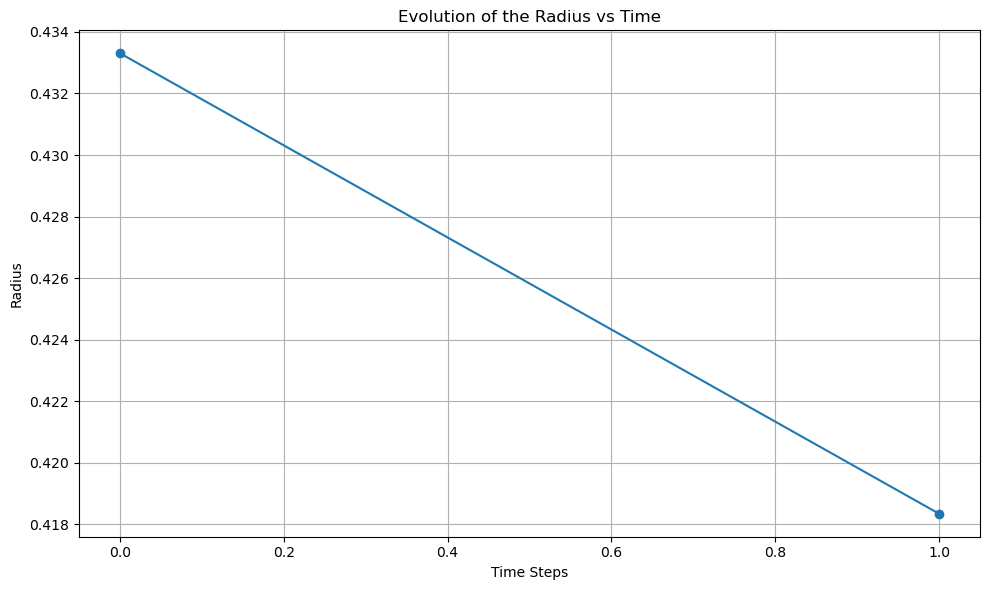

In [55]:
out_phi_np=np.asarray(grund_th[::100][:2])
print(out_phi_np.shape)
radius_vs_time = []
for t in range(out_phi_np.shape[0]):
    area = np.sum(out_phi_np[t] > 1e-2).item()
    radius = np.sqrt(area / (Nx * Ny) / np.pi)
    radius_vs_time.append(radius)

# Plot the radius vs time
plt.figure(figsize=(10, 6))
plt.plot(range(len(radius_vs_time)), radius_vs_time, marker='o', linestyle='-')
plt.xlabel('Time Steps')
plt.ylabel('Radius')
plt.title('Evolution of the Radius vs Time')
plt.grid(True)
plt.tight_layout()
plt.show()



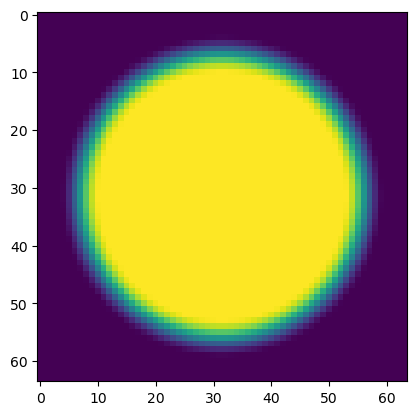

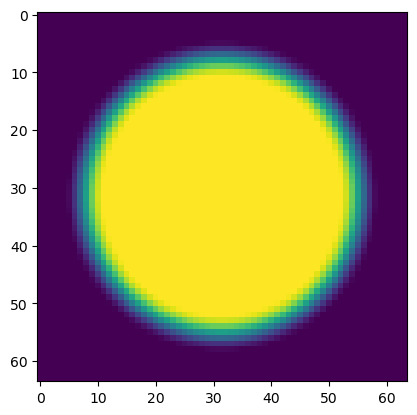

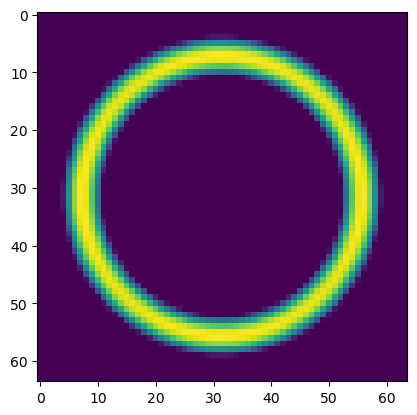

In [44]:
plt.imshow((out_phi_np[0,0]))
plt.show()

plt.imshow((out_phi_np[1,0]))
plt.show()

plt.imshow((out_phi_np[0,0]-out_phi_np[1,0]))
plt.show()


In [26]:
import torch
grund_th_125 = torch.clone(grund_th)

grund_th_125 = grund_th_125[0:1250:10]  # starts at 0, ends before 1250, step 10

print("grund_th_125: ", grund_th_125.shape)


grund_th_125:  torch.Size([125, 1, 64, 64])


In [27]:
index_0_equal = torch.equal(grund_th_125[0], grund_th[0])
print(f"Elements at index 0 are equal: {index_0_equal}")

# Verify if the element at index 1 in grund_th_125 is the same as at index 10 in grund_th
index_1_equal = torch.equal(grund_th_125[1], grund_th[10])
print(f"Elements at index 1 in grund_th_125 and index 10 in grund_th are equal: {index_1_equal}")

Elements at index 0 are equal: True
Elements at index 1 in grund_th_125 and index 10 in grund_th are equal: True


In [ ]:
torch.save(grund_th_125, 'grund_th_125.pt')

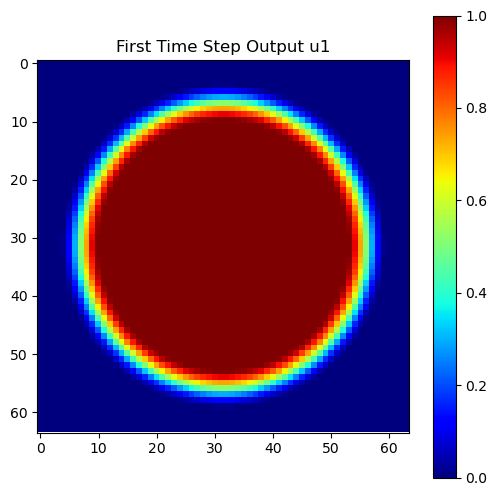

In [102]:
plt.figure(figsize=(6, 6))
plt.imshow(grund_th[1, 0].numpy(), cmap='jet', interpolation='nearest')
plt.title('First Time Step Output u1')
plt.colorbar()
plt.show()

#### Theoretical solution 

In [55]:
np.sqrt(area_area/Nx**2/np.pi)[0]* (Nx*dx)**2/ np.pi

5.668092776352135e-10

In [73]:
lb[0] ,ub[1], lb[0] ,ub[1]

(0, 6.4e-05, 0, 6.4e-05)

Text(0, 0.5, 'R')

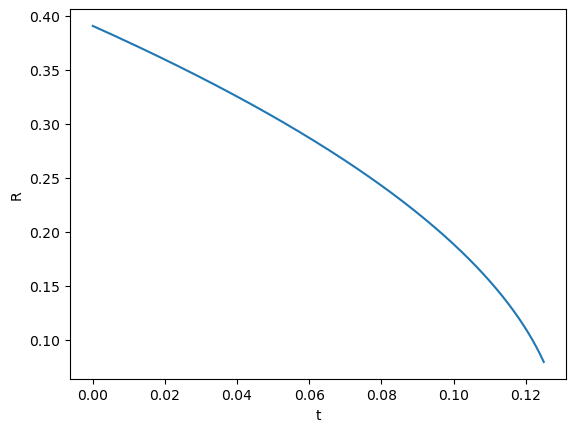

In [85]:
# Initialize array for R values
R = np.zeros(Nt)

# Set initial condition
R[0] = R0 


# Finite difference scheme
for n in range(Nt-1):
    R[n+1] = R[n] + mu*dt * (-(sigma) / R[n] + delta_g)

# Plotting
t = np.linspace(0, ub[2] , Nt)
R_th=np.sqrt((np.pi *R**2/(ub[0] *ub[1]))/np.pi)
plt.figure()
plt.plot(t,R_th )
plt.xlabel('t')
plt.ylabel('R')


In [349]:
FD_data=R
import pickle

with open('plot_data_FD.pickle', 'wb') as f:
    pickle.dump(FD_data, f)


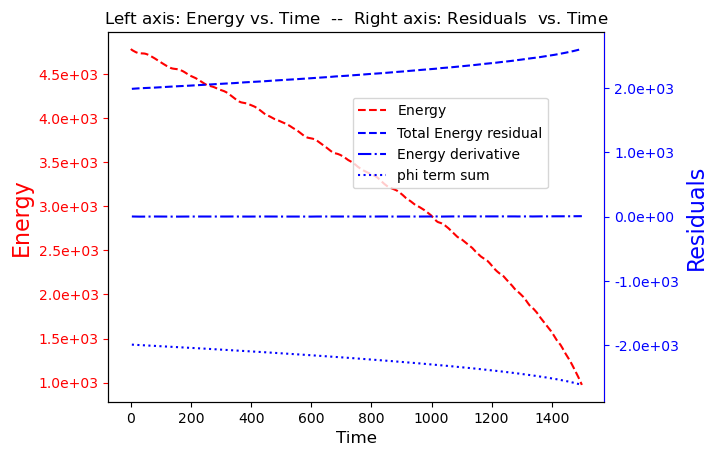

In [126]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

tot_energy = np.asarray(out_energy)
x = out_time  # x-coordinates for spline interpolation
y = tot_energy[:, 0]  # y-coordinates for spline interpolation

# Generate smooth spline curve
spl = make_interp_spline(x, y)

# Calculate derivative at a specific time
time = 0.25  # Example time value
derivative = spl.derivative(nu=1)(time)

# Create figure and axes
fig, ax1 = plt.subplots()
ax1.spines['right'].set_color('red')
ax1.tick_params(axis='y', colors='red')


# Plot the spline curve
ax1.plot(x, y, "r", label=r"$Energy $", linestyle='--')

# Set the first y-axis label
ax1.set_ylabel("Energy", fontsize=16, color="r")

# Create a second y-axis
ax2 = ax1.twinx()
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')


# Plot the second y-axis data
ax2.plot(out_time[3:], np.asarray(out_res)[:, 0], "b--", label="Total Energy residual")
ax2.plot(out_time[3:], -np.asarray(out_res)[:, 1], "b-.", label="Energy derivative")
ax2.plot(out_time[3:], np.asarray(out_res)[:, 2], "b:", label="phi term sum")

# Set the second y-axis label
ax2.set_ylabel("Residuals", fontsize=16, color="b")

# Set the x-axis label and title
ax1.set_xlabel("Time", fontsize=12)
ax1.set_title('Left axis: ' + r"$\bf{Energy}$" + ' vs. Time  --  Right axis: ' + r"$\bf{Residuals}$" + '  vs. Time', fontsize=12)

# Combine the legend from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.9, 0.7), fontsize=10)


# Format y-axis
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))

# Show the plot
plt.show()


In [34]:
print("GPU available:", tf.config.list_physical_devices("GPU"))


GPU available: []


2023-06-13 15:17:28.013801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 15:17:28.013942: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.013978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.014005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-13 15:17:28.014030: W tensorflow/c